**<탐색적 데이터 분석 (EDA)>**
- Exploring Data Analysis

In [63]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp
import matplotlib.pyplot as plt

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

'%.3f'

In [25]:
# 여러 변수 출력 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# SECTION 2.1 데이터 중심의 지표 (기술통계량)
## 평균값
### 산술 평균

In [1]:
x = [1,2,3,4,5]

In [6]:
np.mean(x)
np.array(x).mean()
pd.Series(x).mean()

3.0

3.0

3.000

In [34]:
# 교재 p.31
df = pd.read_csv('./data/ch2_scores_em.csv',
                index_col='student number')
df.head()
df.shape
# ---------영어 과목의 평균 계산---------
# 1. sum(),len() 함수를 이용하여 산술평균 계산
sum(df['english'])/len(df['english'])

# 2. numpy의 mean() 함수를 이용하여 산술평균 계산
np.mean(df['english'])

# 3. pandas의 데이터프레임에서 mean() 함수를 이용하여 산술평균 계산
df['english'].mean()

# 4. scipy의 mean() 함수를 이용하여 산술평균 계산
sp.mean(df['english'])

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


(50, 2)

58.380

58.380

58.380

/var/folders/qk/0ttws_bs3s1fydtrkp_804nc0000gn/T/ipykernel_40641/1842131238.py:17: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(df['english'])


58.380

### 기하 평균
- n개의 양수 값을 모두 곱한 것의 n 제곱근
- 성장률의 평균

<img src='./image/1_00004.png' width='40%' align='left'>

In [16]:
## 예제. 회사의 연 평균 매출 증가율 1차년도에 200%, 2차년도에 800%, 3차년도에 300% 성장 -> 3개년도의 연 평균 성장율은?

data = [200,800,300]

## 1. 산술평균 이용 
np.mean(data) # 433.33333 -> 맞지 않음

## 2. 기하평균 이용 
# 방법 1
# math.prod(data) : data를 다 곱해줌
math.prod(data) ** (1/len(data)) # 363.424

# 방법 2
# scipy.stats.gmean(a[,axis,dtype,weights]) 이용하여 기하 평균 계산
gmean(data)

433.3333333333333

363.424

363.42411856642775

### 조화 평균
- 비율 및 변화율에 대한 평균 계산할 때 사용
- (역수들의 산술평균)의 역수를 취한 값

<img src='./image/1_00005.png' width='30%' align='left'>

In [17]:
## 예제. 100km 떨어진 도시까지 차로 다녀오면서 가는 길에는 시속 80km, 오는 길은 시속 120km로 달렸을 때 평균 속력은 얼마나 되는가?
#       움직인 거리 : 200km, 
#       움직인 시간 : 100/80 + 100/120 


<img src='./image/1_00006.png' width='50%' align='left'>

In [19]:
# 방법 1
data = np.array([80,120])
len(data) / np.sum(1/data) # 역수의 합을 분모, 총 길이(거리)를 분자

# 방법 2
# scipt.stat.hmean(a[,axis,dtype]) 이용하여 조화평균 계산
hmean(data)

95.99999999999999

95.99999999999999

### 가중 평균
- 가중치가 있는 값들의 평균

In [21]:
# 1. 산술평균 이용
np.average(np.arange(1,11)) # 5.5

# 2. 가중치 부여한 가중 평균 이용
np.average(np.arange(1,11), weights = np.arange(10,0,-1))

5.5

4.0

## 중앙값
- 중앙에 위치하는 값, 이상치에 영향을 받지 않음

<img src='./image/1_00007.png' width='50%' align='left'>

In [22]:
# 1. 예제 데이터 생성
scores = np.array(df['english'])
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66])

In [29]:
# 2. 순서 통계량
sorted_scores = np.sort(scores)
sorted_scores
n = len(sorted_scores)
n

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79])

50

In [34]:
# 3. 중앙값 추출하기
# 방법 1
if n%2 == 0 :
    x1 = sorted_scores[(n//2) - 1]
    x2 = sorted_scores[(n//2)]
    median = (x1 + x2) / 2
    x1,x2 
else :
    median = sorted_scores[(n+1//2) - 1]
median

# 방법 2
np.median(sorted_scores)

(57, 58)

57.5

57.5

### +) 절사 평균
- 평균의 장점 + 중앙값의 장점
- 상위 절사비율(%)와 하위 절사비율(%)의 값을 배제하고 산술평균

In [36]:
## 예제
# 1. 평균 2백만원, 표준편차 50만원인 정규분포를 따르는 소득 데이터 100개 생성
np.random.seed(3)
income = np.random.normal(20000000,500000,100) # 평균, 표준편차, 개수
income[:10]

# 2. 산술 평균 계산
np.mean(income)

# 3. 소득 10억인 사람 추가 후 산술 평균 계산 및 중앙값 추출
income = np.append(income, 10**9)
np.mean(income)
np.median(income)

# 4. 절사 평균 계산
# scipy.stats.trim_mean(a, proportiontocut[,axis]) 이용
trim_mean(income,0.2) # 절사비율 : 0.2

array([20894314.237, 20218254.925, 20048248.734, 19068253.648,
       19861305.899, 19822620.51 , 19958629.259, 19686499.662,
       19978090.916, 19761390.985])

19945681.462796967

29649189.567125708

19919743.318406537

19941471.081213262

## 최빈값
- 가장 많이 나타나는 값, 범주형 변수에 대해서만 적용
- DataFrame, Series의 mode 메서드 사용

In [37]:
# 예제 데이터 생성
np.random.seed(3)
data = np.random.choice(['A','B','C'], 1000) # A,B,C 요소로 이뤄진 1000개의 데이터
data[:10]

array(['C', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'C', 'B'], dtype='<U1')

In [41]:
# 방법 1
# scipy.stats.mode(a[,axis,nan_policy]) 함수 이용
mode(data) # 최빈값, 빈도
mode(data).mode # 최빈값 
mode(data).count # 빈도

# 방법 2
# pandas_Series의 value_counts()를 이용한 후 첫번째 결과가 최빈값
pd.Series(data).value_counts()
pd.Series(data).value_counts().index[0] # 최빈값 mode(data).mode
pd.Series(data).value_counts()[0] # 빈도 mode(data).count

ModeResult(mode=array(['A'], dtype='<U1'), count=array([350]))

array(['A'], dtype='<U1')

array([350])

A    350
B    328
C    322
dtype: int64

'A'

350

## + 최소값, 최대값

In [42]:
# 예제 데이터 생성
np.random.seed(123)
data = np.random.normal(100, 20, size=1000) # 100, 
data[:10]

# 방법 1. 데이터 정렬 후 인덱스를 활용한 최소값, 최대값 추출
sorted(data)[0], sorted(data)[-1]

# 방법 2. numpy의 min(), max() 함수 이용
np.min(data)
np.max(data)

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

(35.37889984161376, 171.43158436052622)

35.37889984161376

171.43158436052622

# SECTION 2.2 데이터의 산포도 지표 (변이통계량)
- 데이터의 퍼짐 정도
- 범위, 사분위간 범위, 표준편차, 분산, 변동계수 등

In [43]:
import numpy as np
# numpy float 출력옵션 변경
# np.set_printoptions(precision=3)
# np.set_printoptions(precision=20, suppress=True)
# pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

## 분산과 표준편차
### 편차
- 각 데이터가 평균으로부터 어느 정도 떨어져 있는가 ( xi - mean )
- numpy의 브로드캐스트

In [58]:
scores = [50,60,58,54,51,56,57,53,52,59]
mean = np.mean(scores)
deviation = scores - mean
deviation
np.mean(deviation) # 편차들의 합은 0

array([-5.000, 5.000, 3.000, -1.000, -4.000, 1.000, 2.000, -2.000, -3.000,
       4.000])

0.0

### 분산
- 평균을 중심으로 데이터가 퍼져있는 정도의 측도

<img src='./image/2_00003.png' width='60%' align='left'>

**분산 계산 : var(a, ddof=0) 함수**
- numpy.var(a[, axis, dtype, out, ddof, keepdims, where])
- pandas.Series.var(axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)
- ddof 인수: 델타 자유도
    - ddof=0 : n개로 나눔 (Default) (표본분산)
    - ddof=1 : n-1개로 나눔 (불편분산)

In [62]:
# 예제 데이터
# x = [1,2,3,4,5]
x = [1,3,5,7,9]

# 1. ddof = 1 => n-1개로 나눔
np.var(x, ddof=1)

# 2. ddof = 0 => n개로 나눔
np.var(x, ddof=0)
np.var(x)
np.array(x).var()
pd.Series(x).var(ddof=0)

10.0

8.0

8.0

8.0

8.000

### 표준편차
- 분산의 제곱근

**표준편차 계산: std(a, ddof=0) 함수 사용**
- 데이터의 단위와 동일하게 만듦
    - 분산에서 제곱의 영향을 없앤 지표
- 분산과 표준편차가 크면 클수록 산포가 크다

- **numpy.std**(a[, axis, dtype, out, ddof, keepdims,where])
- **pandas.Series.std**(axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)
- ddof 인수 :
    - 기본값은 0 => 모집단 분산
    - 표본 분산의 경우 1로 설정
    
<img src='./image/2_00004.png' width='70%'>

## 범위와 사분위 범위
### 범위
- 데이터의 최대값과 최솟값의 차이
- 데이터가 퍼져있는 정도를 나타내는 가장 간단한 방법
- 이상값에 영향 받음

**범위(R) = 최댓값 - 최솟값**


In [15]:
## 1. 예제 데이터 생성
np.random.seed(123)
data = np.random.normal(100,20,size=1000) # 평균, 표준편차, 개수를 이용해 정규분포 생성
data[:10]

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

In [16]:
## 2. 범위 계산  
np.max(data), np.min(data)
# 방법 1. 최댓값 - 최솟값
np.max(data) - np.min(data)

# 방법 2. numpy의 ptp(a[,axis,out,keepdims]) 함수 이용하여 범위 계산
np.ptp(data)

(171.43158436052622, 35.37889984161376)

136.05268451891246

136.05268451891246

### 중간 범위
- 최댓값과 최솟값의 평균

In [17]:
## 중간 범위 계산
(np.max(data)+np.min(data))/2

103.40524210106999

### 사분위수와 백분위수
#### 사분위수(Quartile)
- 자료를 크기 순으로 늘어 놓은 수를 4등분한 뒤, 각각의 경계에 있는 수
    - 제 1사분위수 (하사분위수,Q1) : (n+1)¼ = (n+1)25/100 번쩨 순위 값
    - 제 2사분위수 (중위수,Q2) : ½ 번째 값
    - 제 3사분위수 (상사분위수,Q3) : (n+1)¾ = (n+1)75/100 번째 순위 값
    
#### 백분위수(percentile)
- 자료를 크기 순으로 늘어 놓은 수를 100등분한 뒤, 각각의 경계에 있는 수
    - 제 25백분위수 : (n+1)¼ = (n+1)25/100 번쩨 순위 값
    - 제 50백분위수 : ½ 번째 값
    - 제 75백분위수 : (n+1)¾ = (n+1)75/100 번째 순위 값
    
    

**numpy.percentile(a, q[,axis,out, ...]) 함수 이용하여 사분위수, 백분위수 계산**

In [18]:
data[:10]

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

In [19]:
# 1. 제 1사분위수, 제 25백분위수
np.percentile(data,25)

# 2. 제 2사분위수, 제 50백분위수
np.percentile(data,50)

# 3. 제 3사분위수, 제 75백분위수
np.percentile(data,75)

86.30886819268538

99.17628889574436

113.37731495435875

#### 사분위간 범위(interquartile range : IQR)
- IQR = Q₃ - Q₁

In [22]:
## IQR 계산
# 방법 1. numpy.quantile() 이용
np.quantile(data,0.75) - np.quantile(data,0.25)

# 방법 2. scipt.stats.iqr(x[,axis,rng,scale,nan_policy, ... ]) 이용
iqr(data)

27.06844676167337

27.06844676167337

#### 사분위수 편차
- 범위(range)의 문제점을 보완한 척도 
- 사분위간 범위(IQR)을 2로 나눈 값 즉, IQR의 평균

<img src='./image/2_00002.png' width='70%'>

In [23]:
## 사분위수 편차 계산
# 방법 1. numpy.quantile() 이용
(np.quantile(data,0.75) - np.quantile(data,0.25)) / 2

# 방법 2. scipt.stats.iqr(x[, axis, rng, scale, ana_policy, ...]) 이용
iqr(data)/2

13.534223380836686

13.534223380836686

### 5가 통계량
- 최소값, 제1사분위수, 중위수, 제3사분위수, 최대값
- 상자-수렴그림(boxplot)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7f7107af40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7f7107a640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7f7107a190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f438dcd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f438dcd90>],
 'means': []}

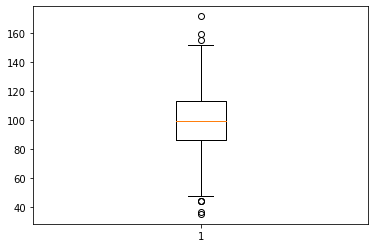

In [26]:
plt.boxplot(data)

### 변동계수(CV : Coefficient of Variable)
- 표본 표준편차를 표본평균으로 나눈 값 또는 그 값에 100을 곱한 값
- **상대표준편차**
- 서로 다른 평균/표준편차를 갖는 여러 데이터의 **흩어진 정도**를 비교할 때 사용
    - ex) 1억 중 만원 vs 10만원 중 만원
    - ex) A집단의 표준편차 = 2kg, B집단의 표준편차 = 3cm 누가 더 중심에 몰려 있나?

- 변동계수 값이 크다 => 흩어진 정도가 상대적으로 크다!

    |  구분  |          몸무게(kg)         | 평균 | 표준편차 | 변동계수 |
    |:------:|:---------------------------:|:----:|:--------:|:--------:|
    | 신생아 | 2.4 / 2.9 / 2.1 / 4.2 / 4.5 | 3.22 |   1.08   |    33    |
    |  성인  |  67.2 / 73 / 69 / 64 / 62.4 | 67.1 |   4.19   |     6    |
    

- 변동계수 계산
    - scipy.stats.variation(a, axis=0, nan_policy='propagate', ddof=0, *, keepdims=False)
    - np.std(x, axis=axis, ddof=ddof) / np.mean(x)

In [58]:
### 예제 1 남녀의 몸무게 변동계수 비교
## 1. 예제 데이터 생성 및 평균/표준편차 확인
men = [72,74,77,68,66,75]
women = [45,48,52,53,46,50]

print('----평균----')
np.mean(men)
np.mean(women)
print('--표본 표준편차--')
np.std(men, ddof=1)
np.std(women, ddof=1)

## 2. 변동계수 계산
# 방법 1. np.std(x, axis=axis, ddof=ddof) / np.mean(x) 이용
# 표준편차 / 평균 직접 계산
print('변동계수(남자)', np.std(men, ddof=1) /np.mean(men))
print('변동계수(여자)', np.std(women, ddof=1) /np.mean(women))

# 방법 2. #scipy.stats.variation(a, axis=0, nan_policy='propagate', ddof=0, *, keepdims=False))
print('변동계수(남자)',variation(men, ddof=1))
print('변동계수(여자)',variation(women, ddof=1))


----평균----


72.0

49.0

--표본 표준편차--


4.242640687119285

3.22490309931942

변동계수(남자) 0.05892556509887895
변동계수(여자) 0.06581434896570246
변동계수(남자) 0.05892556509887895
변동계수(여자) 0.06581434896570246


In [61]:
### 예제 2 신생아와 성인의 몸무게 변동계수 비교
## 1. 예제 데이터 생성 및 평균/표준편차 확인
baby_w = [2.4, 2.9, 2.1, 4.2, 4.5]
adult_w = [67.2, 73, 69, 64, 62.4]

print('----평균----')
np.mean(baby_w)
np.mean(adult_w)
print('--표본 표준편차--')
np.std(baby_w, ddof=1)
np.std(adult_w, ddof=1)

## 2. 변동계수 계산
# 방법 1. np.std(x, axis=axis, ddof=ddof) / np.mean(x) 이용
# 표준편차 / 평균 직접 계산
print('변동계수(남자)', np.std(baby_w, ddof=1) /np.mean(baby_w) * 100)
print('변동계수(여자)', np.std(adult_w, ddof=1) /np.mean(adult_w) * 100)

# 방법 2. #scipy.stats.variation(a, axis=0, nan_policy='propagate', ddof=0, *, keepdims=False))
print('변동계수(남자)',variation(baby_w, ddof=1) * 100)
print('변동계수(여자)',variation(adult_w, ddof=1) * 100)

----평균----


3.22

67.11999999999999

--표본 표준편차--


1.0756393447619885

4.187123117368296

변동계수(남자) 33.40494859509281
변동계수(여자) 6.238264477604734
변동계수(남자) 33.40494859509281
변동계수(여자) 6.238264477604734


## 데이터의 지표 정리
- 관측값수, 범위, 평균, 분산, 왜도, 첨도 계산


- **pandas.Series.describe(percentiles=None, include=None, exclude=None, datatime_is_numeric=False)**
- **pandas.DataFrame.describe(percentiles=None, include=None, exclude=None, datatime_is_numeric=False)**
- **scipy.stats.descirbe(a[,axis,ddof=1,bias,nan_policy])**

In [27]:
data[:10]

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

In [36]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                index_col = 'student number')

In [55]:
# 방법 1. pd.Series.describe()
print('---pandas.Series.describe()---')
print(f'describe(data) : {describe(data)}')
print()
print()
print(f'describe(df["english"]) : {describe(df["english"])}')
print()


# 방법 2. pandas.DataFrame.describe()
print('---pandas.DataFrame.describe()---')
pd.DataFrame.describe(df['english'])
df['english'].describe()


# 방법 3.scipy.stats.descirbe()
print('---scipy.stats.describe()---')
sp.stats.describe(df['english'], ddof=0) # ddof = 0 : 모집단 데이터에 대한 기술통계량


# nobs : 관측치의 수
# minmax : 최소값, 최대값
# mean : 평균
# variance : 분산
# skewness : 왜도
# kurtosis : 첨도

---pandas.Series.describe()---
describe(data) : DescribeResult(nobs=1000, minmax=(35.37889984161376, 171.43158436052622), mean=99.20871727838417, variance=401.03130940853094, skewness=-0.029040113501245676, kurtosis=-0.02543852877769215)


describe(df["english"]) : DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=96.03632653061224, skewness=-0.3167932532496243, kurtosis=-0.38870454364589113)

---pandas.DataFrame.describe()---


count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

---scipy.stats.describe()---


DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=94.1156, skewness=-0.3167932532496243, kurtosis=-0.38870454364589113)

# SECTION 2.3 데이터의 정규화